# Multi Class Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

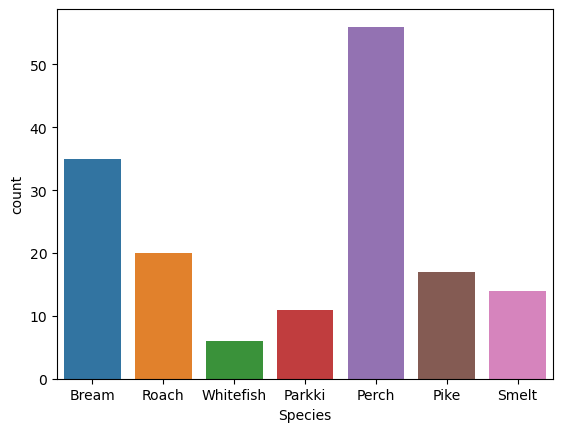

In [8]:
sns.countplot(x=df['Species']);

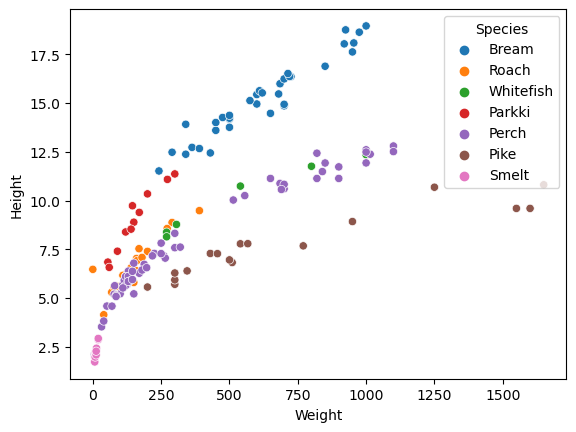

In [9]:
sns.scatterplot(x='Weight', y='Height', data=df,hue ='Species');

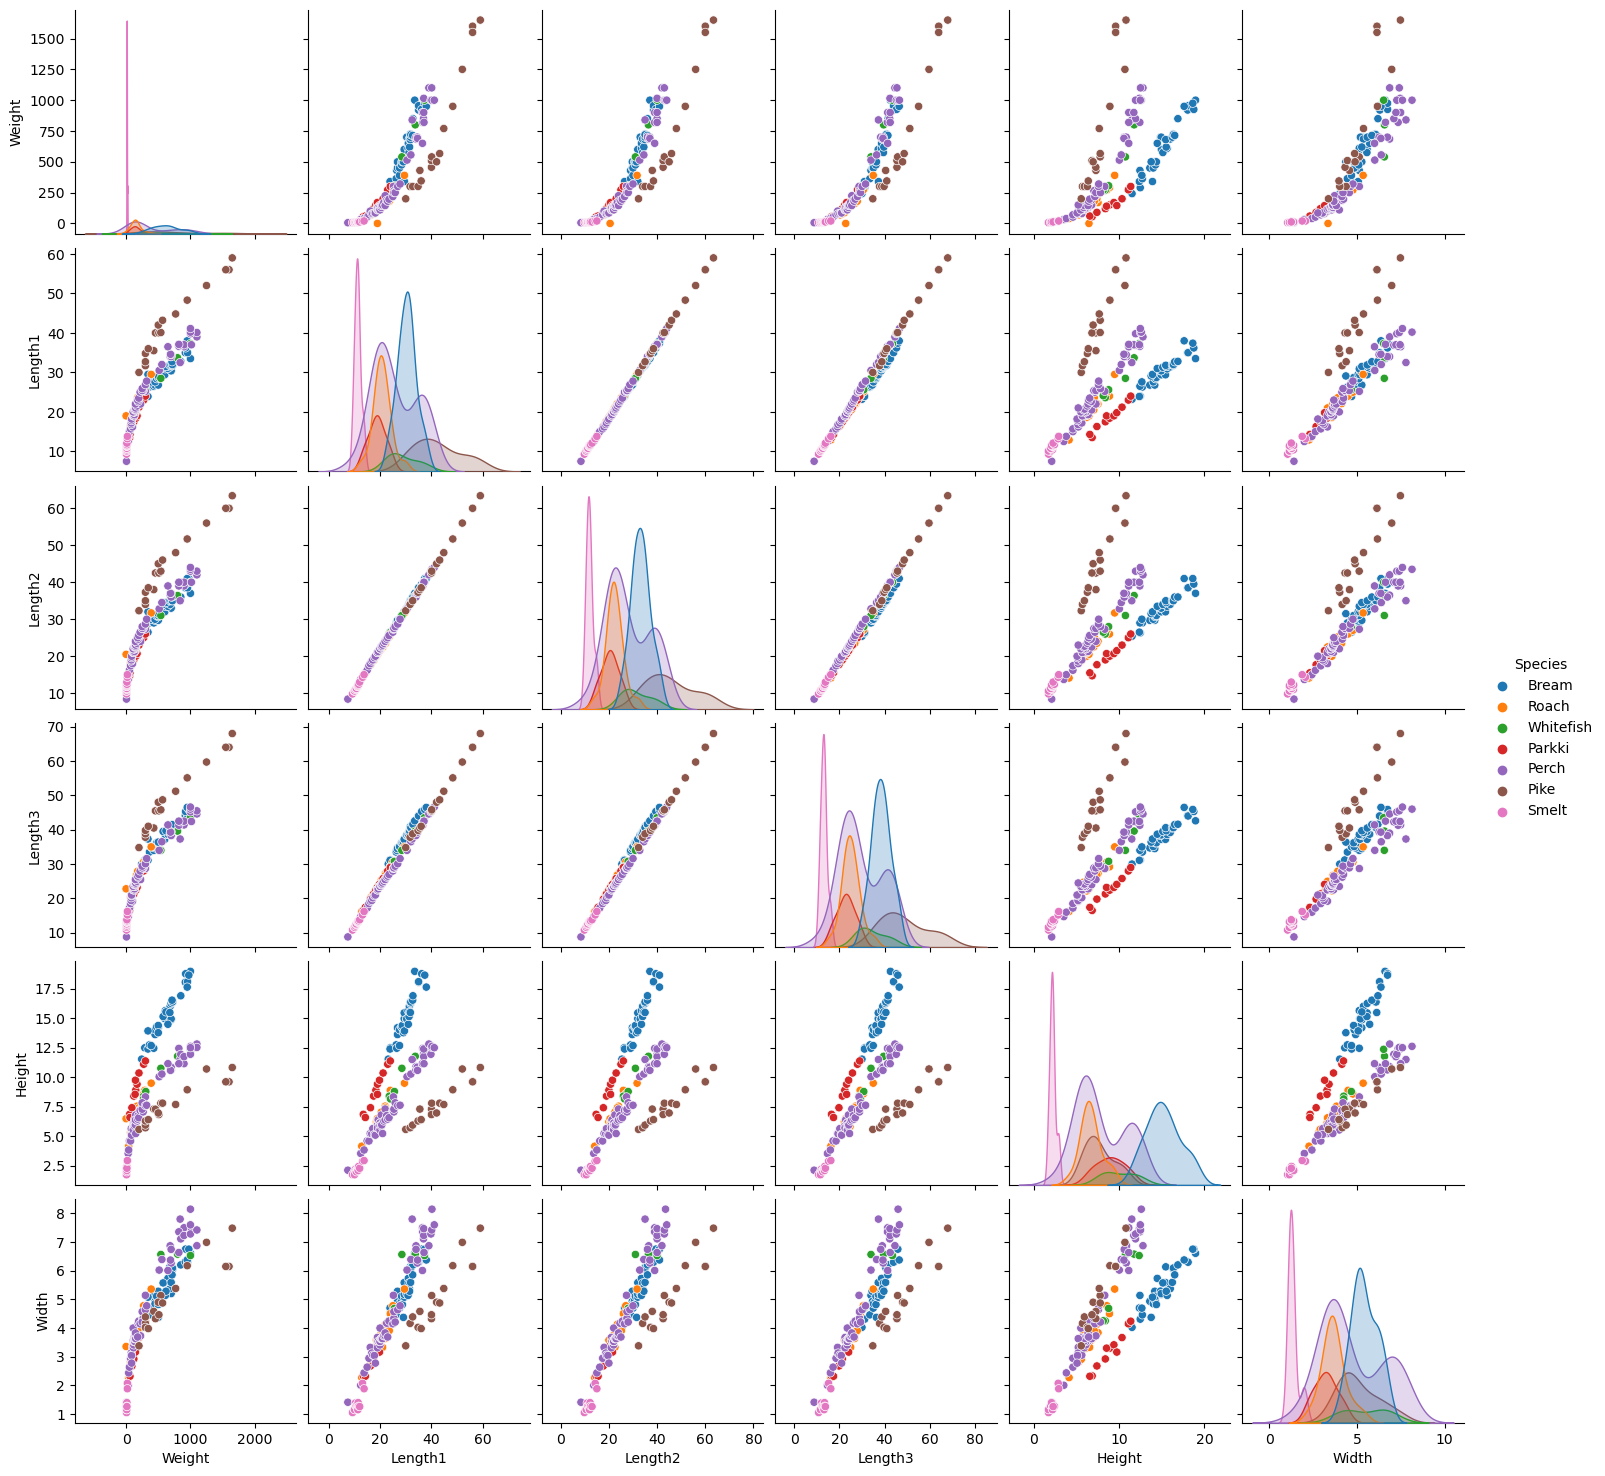

In [ ]:
sns.pairplot(df, hue='Species')

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_20400/4095736044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


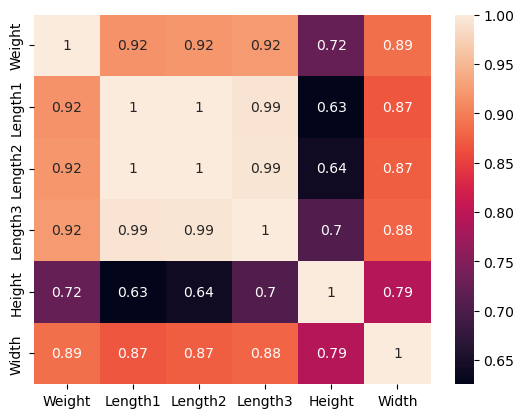

In [11]:
sns.heatmap(df.corr(), annot=True);

## Train Test

In [12]:
X = df.drop('Species', axis=1)
y = df['Species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9)

In [15]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


## Log Regr Model Kurma

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [47]:
log_model = LogisticRegression(solver = 'saga'  
                              ,multi_class ='ovr' 
                              ,max_iter = 5000 )

In [48]:
penalty =  ['l1','l2']

C = np.logspace(0,5,16)

In [49]:
C

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05])

In [50]:
grid_model = GridSearchCV(
    log_model,
    param_grid={
        'C' : C,
        'penalty' : penalty
    },
)

In [51]:
grid_model.fit(scaled_X_train, y_train)

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [52]:
grid_model.best_params_

{'C': 10.0, 'penalty': 'l1'}

In [53]:
grid_model.best_estimator_

LogisticRegression(C=10.0, max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [54]:
grid_model.best_estimator_.coef_

array([[ -2.73890083,   0.        ,   0.        ,   0.        ,
         11.21995108,  -1.19231333],
       [ -7.15171853,   0.        ,   0.        , -11.22846332,
         11.35399521,   0.        ],
       [ -1.5939179 ,   4.93726547,  28.66053804, -37.30585028,
         -0.58017288,   5.29765519],
       [ -0.59859687,   2.45816818,   2.11841903,   4.01770145,
         -5.31399145,  -2.36797762],
       [-10.44928064,   0.        , -21.3044028 ,  21.33940605,
         -1.81031575,   5.82340991],
       [  0.        ,   2.31770871,   0.        ,   0.88479479,
         -5.24424727,  -6.12171618],
       [ -2.42926832,  -0.73361071,   0.        ,   0.        ,
          0.        ,   3.43234378]])

## Model Performans

In [56]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [57]:
fish_pred = grid_model.predict(scaled_X_test)

In [58]:
accuracy_score(y_test, fish_pred)

0.9375

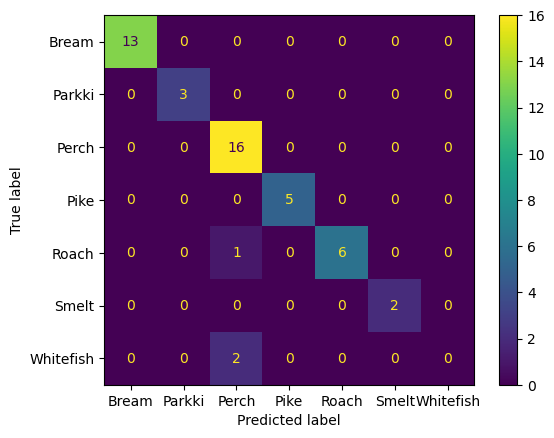

In [60]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test);

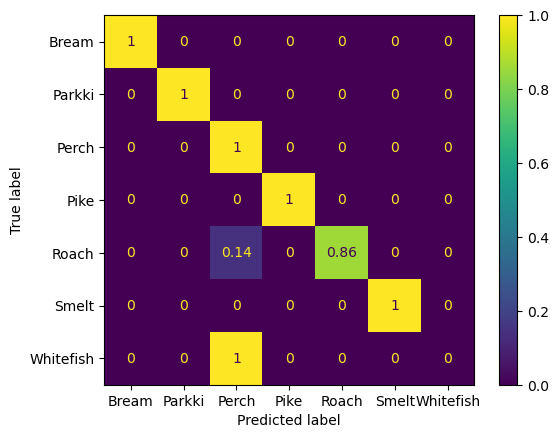

In [62]:
ConfusionMatrixDisplay.from_estimator(grid_model,
                                      scaled_X_test, y_test,
                                     normalize='true');

In [63]:
print(classification_report(y_test, fish_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.84      1.00      0.91        16
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.86      0.92         7
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.83      0.84      0.83        48
weighted avg       0.91      0.94      0.92        48



/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier